# Labor economics, data, and Claudia Goldin
Hello Baltimore Polytechnic AP Economics students! This is a *Jupyter notebook*, which is a convenient way to present code with results and visualizations to a general audience. This notebook will accompany the slides of the same name (in this GitHub repo). This notebook will try to provide a gentle introduction to working with data using Python, an open-source language that is very popular in economics, data science, machine learning, and elsewhere.

First, we need to do some basic setup. This means we are going to import all the packages that we will be using in our code. For example, we are going to want to make charts; to do this we call *matplotlib*, which is a Python library for data visualizations. We are also going to import a data set called "workers."

In [7]:
# Import the libraries that we will need for the rest of the code
import pandas as pd # pandas is a package for working with data
import numpy as np # numpy is the main package for mathematical operations
import matplotlib.pyplot as plt # this is Python's main package for data visualization
import seaborn as sns # additional visualization tools
import statsmodels.api as sm # package to do linear regression

# let's also pull in our data set
file_path = './data/workers.csv'
# Read the CSV file into a Pandas DataFrame
workers = pd.read_csv(file_path)

# url = 'https://raw.githubusercontent.com/JohnRGreen/BaltimorePolyEcon/main/workers.csv'
# workers = pd.read_csv(url)

When you open up any new data set you first want to figure out what you are working with. Specifically:
1. How big is the data set?
2. What variables do you have?
3. What is the population?

In [8]:
# Show the dimensions (rows and columns) of the dataset
dimensions = workers.shape
print("Dataset dimensions (rows, columns) are:", dimensions)

# List the variables (column names) included in the dataset
variables = workers.columns.tolist()
print("\nVariables Included in the Dataset:")
for var in variables:
    print("-", var)

Dataset dimensions (rows, columns) are: (250, 4)

Variables Included in the Dataset:
- Age
- Education
- Kids
- wages


It can also be helpful to print the first few lines of data:

In [9]:
# print data by calling the "head" function
workers.head()

,Age,Education,Kids,wages
0,40.0,16,2,30.073870
1,29.0,10,0,19.754192
2,28.0,12,0,21.961251
3,31.0,17,0,24.789884
4,40.0,16,1,25.772830


So it appears that we have 250 *observations*, which correspond to the rows in our data, and 4 *variables*, which are the columns. Specifically, this data set is for female workers. So in other words, we have data on 250 women in the labor force, and for each woman we have:
1. Age
2. Education
3. Number of kids
4. Wages

But we still don't know much about the variables themselves. Let's start with the number of kids, and see what the distribution (shape) of the data looks like, by looking at:
1. *Min* and *max*: lowest and highest values
2. *Mean*: the average value
3. *Median*: the "middle" value
4. *Standard deviation*: the "spread" of the data
5. *Mode*: the most common value

In [10]:
# Summary statistics
mean = workers.Kids.mean()
median = workers.Kids.median()
std_dev = workers.Kids.std()
mode = workers.Kids.mode().values[0]  # Mode might return multiple values, so taking the first one
min = np.min(workers.Kids)
max = np.max(workers.Kids)

print("Summary Statistics for the Kids variable")
print("The values range from", min, "to", max)
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Mode:", mode)


Summary Statistics for the Kids variable
The values range from 0 to 3
Mean: 0.828
Median: 1.0
Standard Deviation: 0.9727285352105446
Mode: 0


Our data covers those with between 0 and 3 kids. The most common number of kids actually is 0, but the average is close to 1 (which is the median). The standard deviation is a little harder to interpret, but it is about 1 child, so we should expect that there are many people in different groups.

These numbers are helpful, but it would probably be better to see what the data looks like visually. To do so we can make a *histogram*, which just counts how many observations we have in each category.

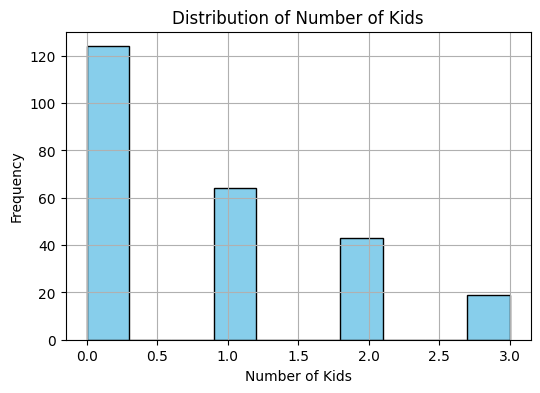

In [11]:
# Histogram
plt.figure(figsize=(6, 4))
plt.hist(workers.Kids, bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Number of Kids')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Kids')
plt.grid(True)
plt.show()

This is a little more helpful, but just shows the same thing as our summary statistics. Most women in the data have 0 kids, and fewer and fewer have each number higher than this, to a maximum of 3. However, there is a fair amount of variance: even though most have 0, there are many observations in each bucket.

Let's just do the same thing for each of our other variables of age, wage, and education.

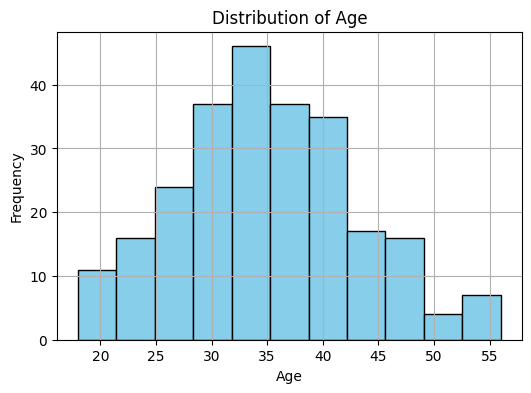

In [12]:
# Histogram
plt.figure(figsize=(6, 4))
plt.hist(workers.Age, bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.grid(True)
plt.show()

The sample is clustered around age 35, with tails on either end. What about education level?

C:\Users\johng\AppData\Local\Temp\ipykernel_2632\2988304582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=workers, x='Education', palette='viridis')


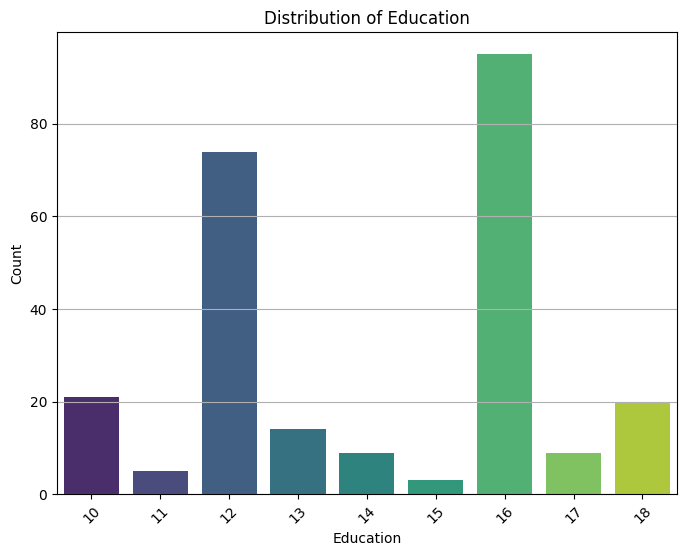

In [13]:
# Count plot for the 'Education' column
plt.figure(figsize=(8, 6))
sns.countplot(data=workers, x='Education', palette='viridis')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility if needed
plt.grid(axis='y')  # Show grid along the y-axis
plt.show()

Education looks much more "lumpy" than age did! This should make sense, though, if we look at where the spikes are. 12 years of school would represent a high school degree, and 16 would represent a college degree; we can see that most of our sample is at one of these two places, with a smaller portion getting a master's degree (18 years), getting some college but no degree (13-15), or dropping out of high school (10 or 11).

Lastly let's look at wages:

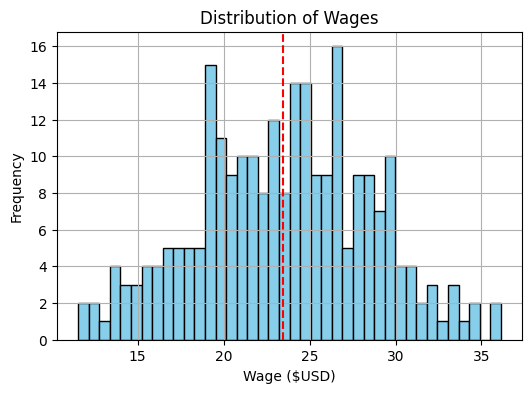

In [14]:
# Histogram
# Calculate mean and median
mean_wage = workers['wages'].mean()

# start figure
plt.figure(figsize=(6, 4))
plt.hist(workers.wages, bins=40, color='skyblue', edgecolor='black')

# Plot dashed lines for mean and median
plt.axvline(mean_wage, color='red', linestyle='--', linewidth=1.5, label=f'Mean: ${mean_wage:.2f}')

# Now plot wage data
plt.xlabel('Wage ($USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Wages')
plt.grid(True)
plt.show()

Now this shape is interesting. It does not exactly look like a bell curve, and it's pretty lumpy.

Now suppose we want to understand the relationship between wages and age. The first thing we might want to do is make a *scatterplot* which plots each pair of age and education on a graph.

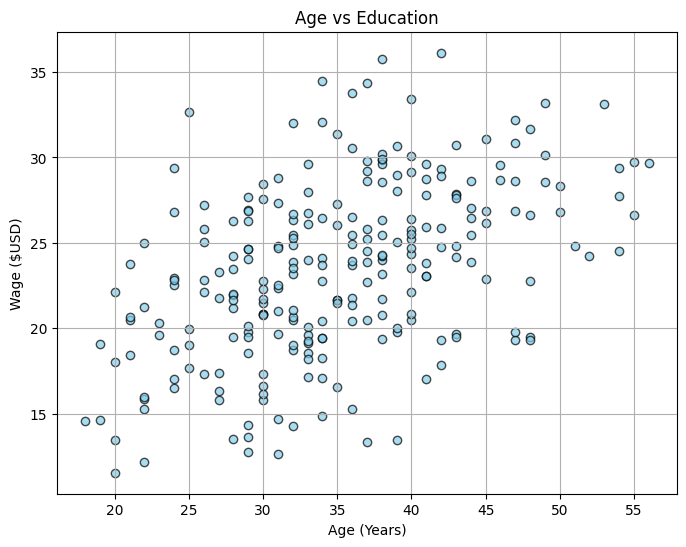

In [15]:
# Scatter plot for wages and education
plt.figure(figsize=(8, 6))
plt.scatter(workers['Age'], workers['wages'], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age (Years)')
plt.ylabel('Wage ($USD)')
plt.title('Age vs Education')
plt.grid(True)
plt.show()

It kind of looks like as workers get older, their wages go up. This isn't surprising, right? But how could we understand this relationship a little more deeply?

Well, we might try and draw a line through the data, showing the overall trend:

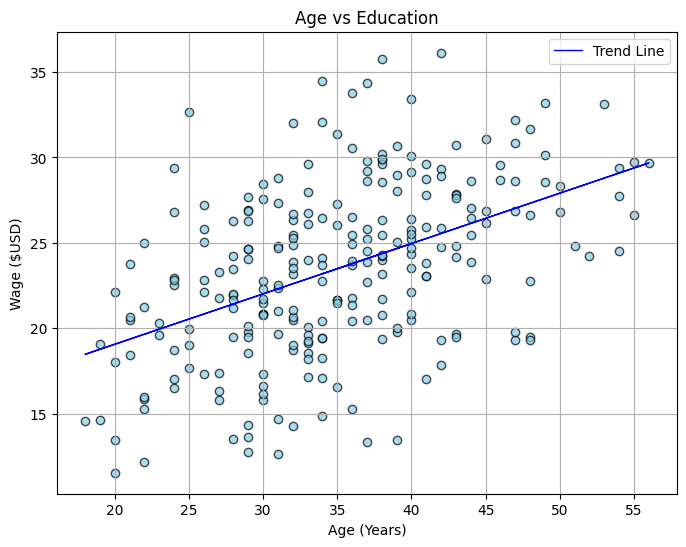

In [16]:
# Scatter plot for wages and education
plt.figure(figsize=(8, 6))
plt.scatter(workers['Age'], workers['wages'], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age (Years)')
plt.ylabel('Wage ($USD)')
plt.title('Age vs Education')
plt.grid(True)

# Calculate the trend line (best fit line)
poly_fit = np.polyfit(workers['Age'], workers['wages'], 1)
trend_line = np.poly1d(poly_fit)

# Plotting the trend line
plt.plot(workers['Age'], trend_line(workers['Age']), color='blue', linewidth=1, label='Trend Line')
plt.legend()

plt.show()


This is the line which *best fits* the data. In technical terms, it means that we're drawing a line which minimizes the sum of all (squared) errors between the line and the data.

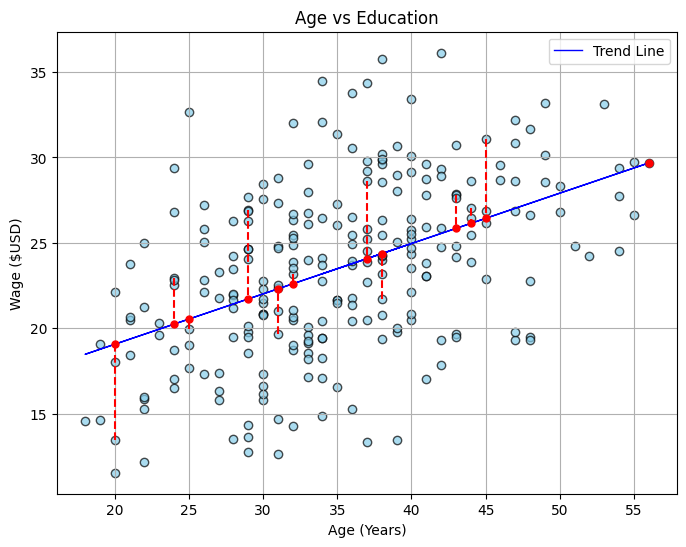

In [17]:
# Scatter plot for wages and education
plt.figure(figsize=(8, 6))
plt.scatter(workers['Age'], workers['wages'], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age (Years)')
plt.ylabel('Wage ($USD)')
plt.title('Age vs Education')
plt.grid(True)

# Calculate the trend line (best fit line)
poly_fit = np.polyfit(workers['Age'], workers['wages'], 1)
trend_line = np.poly1d(poly_fit)

# Plotting the trend line
plt.plot(workers['Age'], trend_line(workers['Age']), color='blue', linewidth=1, label='Trend Line')
plt.legend()

# Selecting 4 data points for illustration
selected_points = workers.sample(12, random_state=42)

# Plotting lines from data points to the trend line
for i, point in selected_points.iterrows():
    x = point['Age']
    y = point['wages']
    plt.plot([x, x], [y, trend_line(x)], color='red', linestyle='--', linewidth=1.5)
    plt.plot(x, trend_line(x), marker='o', markersize=5, color='red')  # Marking points on the trend line


plt.show()


We can imagine drawing a line, calculating all of those errors (given by the dashed red lines), drawing another line, adding them up again, and continuing until we find the best one. (Luckily we don't literally have to do this.)

Now let's think about something slightly more interesting: what is the relationship between *education* and wages? Let's start with a scatterplot again.

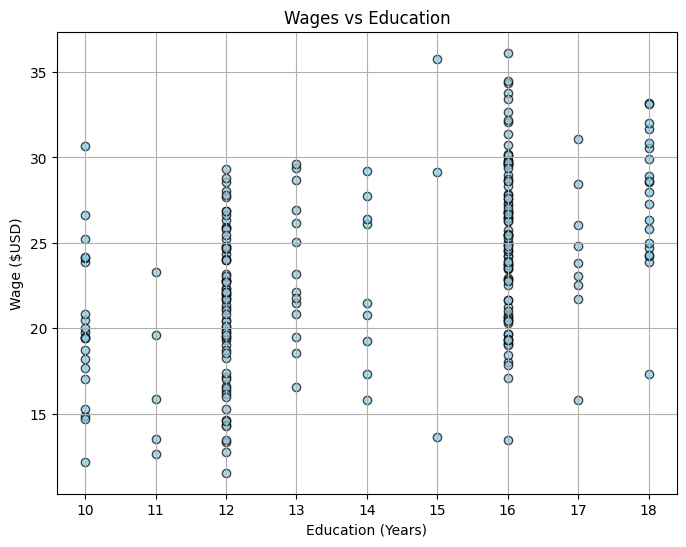

In [18]:
# Scatter plot for wages and education
plt.figure(figsize=(8, 6))
plt.scatter(workers['Education'], workers['wages'], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Education (Years)')
plt.ylabel('Wage ($USD)')
plt.title('Wages vs Education')
plt.grid(True)
plt.show()

Notice how unlike with age, all of the data are lined up vertically. This is because our education variables is *discrete*, meaning it only takes on integer (1,2,...) values. But we can still draw a trend line, like we did before:

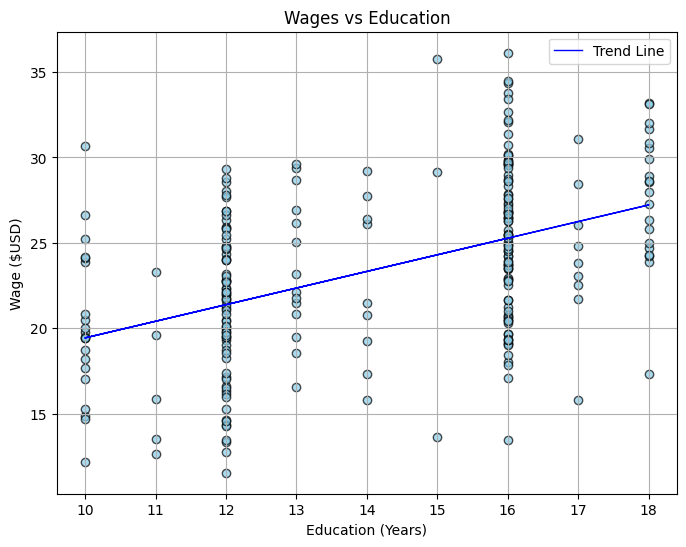

In [19]:
# Scatter plot for wages and education
plt.figure(figsize=(8, 6))
plt.scatter(workers['Education'], workers['wages'], color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Education (Years)')
plt.ylabel('Wage ($USD)')
plt.title('Wages vs Education')
plt.grid(True)

# Calculate the trend line (best fit line)
poly_fit = np.polyfit(workers['Education'], workers['wages'], 1)
trend_line = np.poly1d(poly_fit)

# Plotting the trend line
plt.plot(workers['Education'], trend_line(workers['Education']), color='blue', linewidth=1, label='Trend Line')
plt.legend()

plt.show()


Once again we see a trend line suggesting a positive relationship, or *correlation*, between years of education and wages. And once again, this probably isn't a surprise: more education means higher wages.

Now, what if we want to quantify the extent of the relationship? That is, we want to say by *how much* an extra year of education increases wages?

Economists have a tool which is essentially a fancier version of drawing the trend line through the data, called *linear regression*. Actually, the trend line essentially *is* a linear regression. Don't worry about the details, but basically we will perform a calculation which tells us what the correlation is between education and wages.

In [20]:
# Add a constant to the independent variable (education)
workers['const'] = 1

# Define dependent and independent variables
X = workers[['const', 'Education']]
y = workers['wages']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  wages   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     69.27
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           5.79e-15
Time:                        14:31:40   Log-Likelihood:                -728.69
No. Observations:                 250   AIC:                             1461.
Df Residuals:                     248   BIC:                             1468.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7029      1.679      5.778      0.0

Now, don't worry about all of the output that the linear regression gives us. For now the important number is the *coefficient* for Education, which is 0.9731. This implies that every additional year of education is associated in our data with an extra dollar of hourly wages. 

We also might be interested in the *standard error*, which gives us a measure of the uncertainty about our estimated coefficient. In this case, the s.e. is 0.117, which is relatively small compared to 0.97.

Now, we can do this for multiple variables at a time. Let's use our full data set and determine the impact of education, age, and number of kids on income.

In [21]:
# Add a constant to the independent variable (education)
workers['const'] = 1

# Define dependent and independent variables
X = workers[['const', 'Education', 'Age','Kids']]
y = workers['wages']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  wages   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     51.44
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           7.63e-26
Time:                        14:31:40   Log-Likelihood:                -698.62
No. Observations:                 250   AIC:                             1405.
Df Residuals:                     246   BIC:                             1419.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9961      1.742      1.720      0.0

One interesting thing to notice is that once we accounted for the other factors, the coefficient for education decreased a bit. We notice that the coefficient for age is in fact positive, as our scatterplot suggested, and finally that there is a *negative* relationship between wages and the number of kids, as suggested by Goldin's work.

As our final task, we're going to demonstrate one of the pitfalls of data analysis.

One thing economists always need to be aware of is *who is present* in the data and, on the flip side, *who is missing*. Our data set is for workers, but of course there are many people not in the labor force. Presumably these are people who saw their wage offer and decided not to work. Let's imagine that we had data on these nonworkers.

In [22]:
# Read the CSV file into a Pandas DataFrame
all = pd.read_csv('./data/full_data.csv')
all.head()
# url = 'https://raw.githubusercontent.com/JohnRGreen/BaltimorePolyEcon/main/full_data.csv'
# all = pd.read_csv(url)

,Age,Education,Kids,wages,H
0,55.0,16,0,29.729207,1.0
1,35.0,18,0,27.301326,1.0
2,40.0,12,2,21.861150,0.0
3,53.0,16,3,24.686152,0.0
4,35.0,18,0,17.851361,0.0


We want to find out the relationship between wages and education for the full population, not just the workers. Let's go ahead and make a scatterplot of education and wages for the full group.

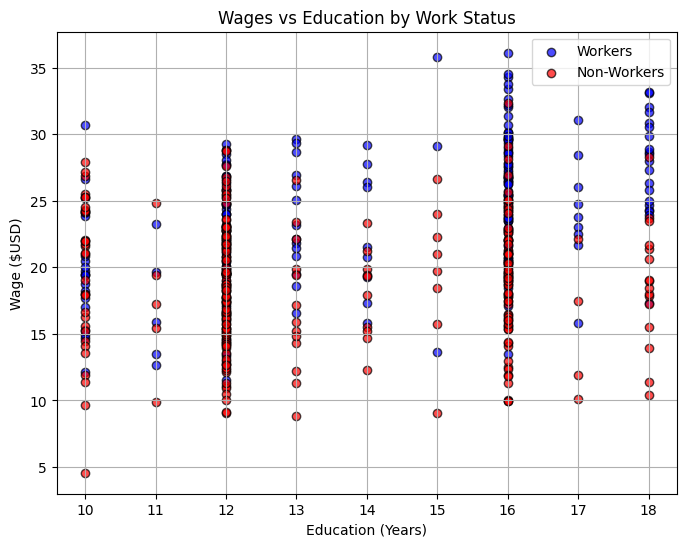

In [23]:
# Splitting the data into workers and non-workers
workers = all[all['H'] == 1]
non_workers = all[all['H'] == 0]

# Scatter plot for wages and education with different colors for workers and non-workers
plt.figure(figsize=(8, 6))
plt.scatter(workers['Education'], workers['wages'], color='blue', edgecolor='black', alpha=0.7, label='Workers')
plt.scatter(non_workers['Education'], non_workers['wages'], color='red', edgecolor='black', alpha=0.7, label='Non-Workers')
plt.xlabel('Education (Years)')
plt.ylabel('Wage ($USD)')
plt.title('Wages vs Education by Work Status')
plt.legend()
plt.grid(True)
plt.show()

The scatterplot has some areas of heavy red (non-workers) and little blue (workers), and some areas with the opposite. This suggests there may be some differences between the two groups. To better see this, let's go ahead draw trend lines for the full population and for each group on its own.

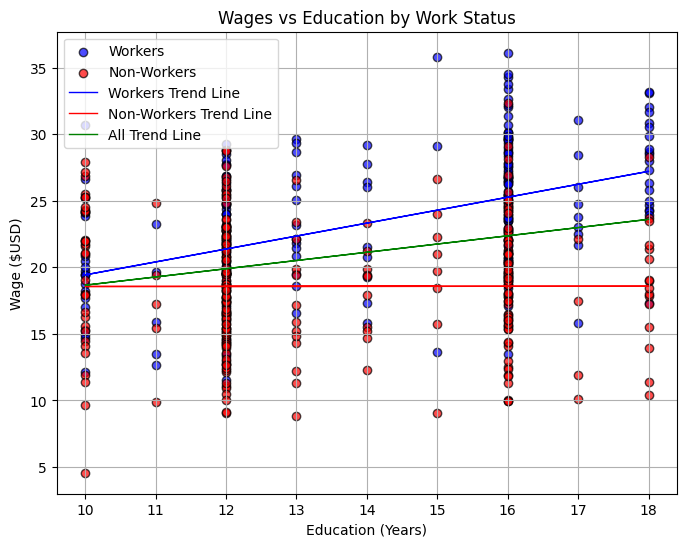

In [24]:
# Splitting the data into workers and non-workers
workers = all[all['H'] == 1]
non_workers = all[all['H'] == 0]

# Fit linear regression models for workers, non-workers, and the whole population
model_workers = sm.OLS(workers['wages'], sm.add_constant(workers['Education'])).fit()
model_non_workers = sm.OLS(non_workers['wages'], sm.add_constant(non_workers['Education'])).fit()
model_all = sm.OLS(all['wages'], sm.add_constant(all['Education'])).fit()

# Scatter plot for wages and education with different colors for workers and non-workers
plt.figure(figsize=(8, 6))
plt.scatter(workers['Education'], workers['wages'], color='blue', edgecolor='black', alpha=0.7, label='Workers')
plt.scatter(non_workers['Education'], non_workers['wages'], color='red', edgecolor='black', alpha=0.7, label='Non-Workers')
plt.xlabel('Education (Years)')
plt.ylabel('Wage ($USD)')
plt.title('Wages vs Education by Work Status')

# plot trend lines too
plt.plot(workers['Education'], model_workers.predict(sm.add_constant(workers['Education'])), color='blue', linewidth=1, label='Workers Trend Line')
plt.plot(non_workers['Education'], model_non_workers.predict(sm.add_constant(non_workers['Education'])), color='red', linewidth=1, label='Non-Workers Trend Line')
plt.plot(all['Education'], model_all.predict(sm.add_constant(all['Education'])), color='green', linewidth=1, label='All Trend Line')


plt.legend()
plt.grid(True)
plt.show()

So if we look at the full population, it actually seems like the relationship between education and wages is much weaker!

We know we can test this out --- let's look at our regression when we run it on the full population.

In [25]:
# Add a constant to the independent variable (education)
all['const'] = 1

# Define dependent and independent variables
X = all[['const', 'Education', 'Age','Kids']]
y = all['wages']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  wages   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     27.69
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.43e-16
Time:                        14:31:41   Log-Likelihood:                -1522.7
No. Observations:                 500   AIC:                             3053.
Df Residuals:                     496   BIC:                             3070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1506      1.603      5.710      0.0

All of our coefficients have changed pretty significantly. The impact of education and age are weaker, and the impact of having kids is stronger (in the negative direction).

In reality, we almost never observe potential wages for non-workers, so economists have developed more sophisticated tools for accounting for this *bias*. The important point is that we always need to be careful and thoughtful about our data, including thinking about who we observe and who we do not.